# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

# What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

## Dataset

In [ ]:
#The data has already been divided into a training and a testing dataset.

In [16]:
data = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
data.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius


`Keep calm and code on!`

In [14]:
test_data = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [15]:
test_data.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


## Explore Data

In [ ]:
# we proceed to the exploration of the training dataset, which is the one we will use to teach the model, and eventually make predictions

In [4]:
data.shape

(12017, 11)

In [12]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [17]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


<AxesSubplot:xlabel='count', ylabel='10'>

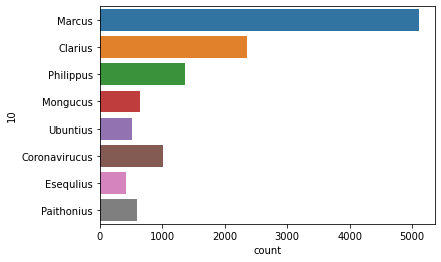

In [10]:
# Your code
sns.countplot(y=data['10'])

# Challenge - train your models, make the best prediction

### Label encoder 
Encode target labels with value between 0 and n_classes-1.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["numeric"] = le.fit_transform(data["10"])

In [19]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6


In [20]:
columnas = [a for a in data.columns if a not in ["10","numeric"]]
X = data[columnas]
y = data["numeric"]

In [ ]:
# y is our target variable
# x is our predict variable

### Train_Test Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [37]:
# using sklearn's train_test_split we divide the dataset into random train and test subsets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(9613, 10)

In [24]:
y_train.shape

(9613,)

In [25]:
X_test.shape

(2404, 10)

In [26]:
y_test.shape

(2404,)

In [ ]:
# shape is compatible

### Train One Model

Classifier implementing the k-nearest neighbors vote. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
neigh = KNeighborsClassifier(n_neighbors=8) # there are 8 monks

In [55]:
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=8)

In [57]:
y_pred = neigh.predict(X_test)

In [63]:
y_pred

array([3, 0, 3, ..., 3, 3, 3])

In [66]:
# data["prediction_monks"] = neigh.predict(data[["numeric"]])

### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Accuracy
- Precission
- Recall
- F1_score

In [68]:
# como no consigo meterlo en dataframe, no puedo hacer el crosstab ni la matriz confusión
# confusion_matrix(y_true=df.numeric, y_pred=df.prediction_monks)

In [86]:
# Accuracy: predicciones correctas
accuracy= accuracy_score(y_test, y_pred)

# precision: cuantas veces lo que dice mi modelo es cierto
precision= precision_score(y_test, y_pred, average='weighted') #'weighted' calculates metrics for each label, and finds their average weighted by support

# exhaustividad/recall: cantidad en que el modelo puede identificar la verdad
recall = recall_score(y_test, y_pred, average='weighted')

# f1: recall y orecision combinados
f1 = f1_score(y_test, y_pred, average='weighted')

In [108]:
print("Accuracy= ", round(accuracy,4))
print("Precision= ", round(precision,4))
print("Recall= ", round(recall,4))
print("F1= ", round(f1,4))

Accuracy=  0.8161
Precision=  0.8227
Recall=  0.8161
F1=  0.8137


In [ ]:
# todas las métricas parecen rondar los mismos valores

### Training several models and explores the metrics for each of them

- DecisionTreeClassifier
- SVC
- RandomForestClassifier
- AdaBoostClassifier
- DecisionTreeClassifier

In [119]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()

tree = model.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [120]:
# DecisionTreeClassifier - METRICS

print("Accuracy= ", round(accuracy_score(y_test, y_pred), 4))
print("Precission= ", round(precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall= ", round(recall_score(y_test, y_pred, average = 'weighted'), 4))
print("F1= ", round(f1_score(y_test, y_pred, average = 'weighted'), 4))

Accuracy=  0.9759
Precission=  0.976
Recall=  0.9759
F1=  0.9759


In [112]:
# SVC

from sklearn.svm import SVC

model = SVC()

svc = model.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [113]:
# SVC - METRICS

print("Accuracy= ", round(accuracy_score(y_test, y_pred), 4))
print("Precission= ", round(precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall= ", round(recall_score(y_test, y_pred, average = 'weighted'), 4))
print("F1= ", round(f1_score(y_test, y_pred, average = 'weighted'), 4))

Accuracy=  0.6855
Precission=  0.7057
Recall=  0.6855
F1=  0.6447


In [121]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

forest = model.fit(X_train, y_train)

y_pred = forest.predict(X_test)

In [122]:
# RandomForestClassifier - METRICS

print("Accuracy= ", round(accuracy_score(y_test, y_pred), 4))
print("Precission= ", round(precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall= ", round(recall_score(y_test, y_pred, average = 'weighted'), 4))
print("F1= ", round(f1_score(y_test, y_pred, average = 'weighted'), 4))

Accuracy=  0.9904
Precission=  0.9905
Recall=  0.9904
F1=  0.9904


In [123]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

ada = model.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [125]:
# AdaBoostClassifier - METRICS

print("Accuracy= ", round(accuracy_score(y_test, y_pred), 4))
print("Precission= ", round(precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall= ", round(recall_score(y_test, y_pred, average = 'weighted'), 4))
print("F1= ", round(f1_score(y_test, y_pred, average = 'weighted'), 4))

Accuracy=  0.5096
Precission=  0.3384
Recall=  0.5096
F1=  0.361


/Users/isabelalantero/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)

In [ ]:
# highest metrics --> Random Forest
# lowest metrics --> Ada Boost